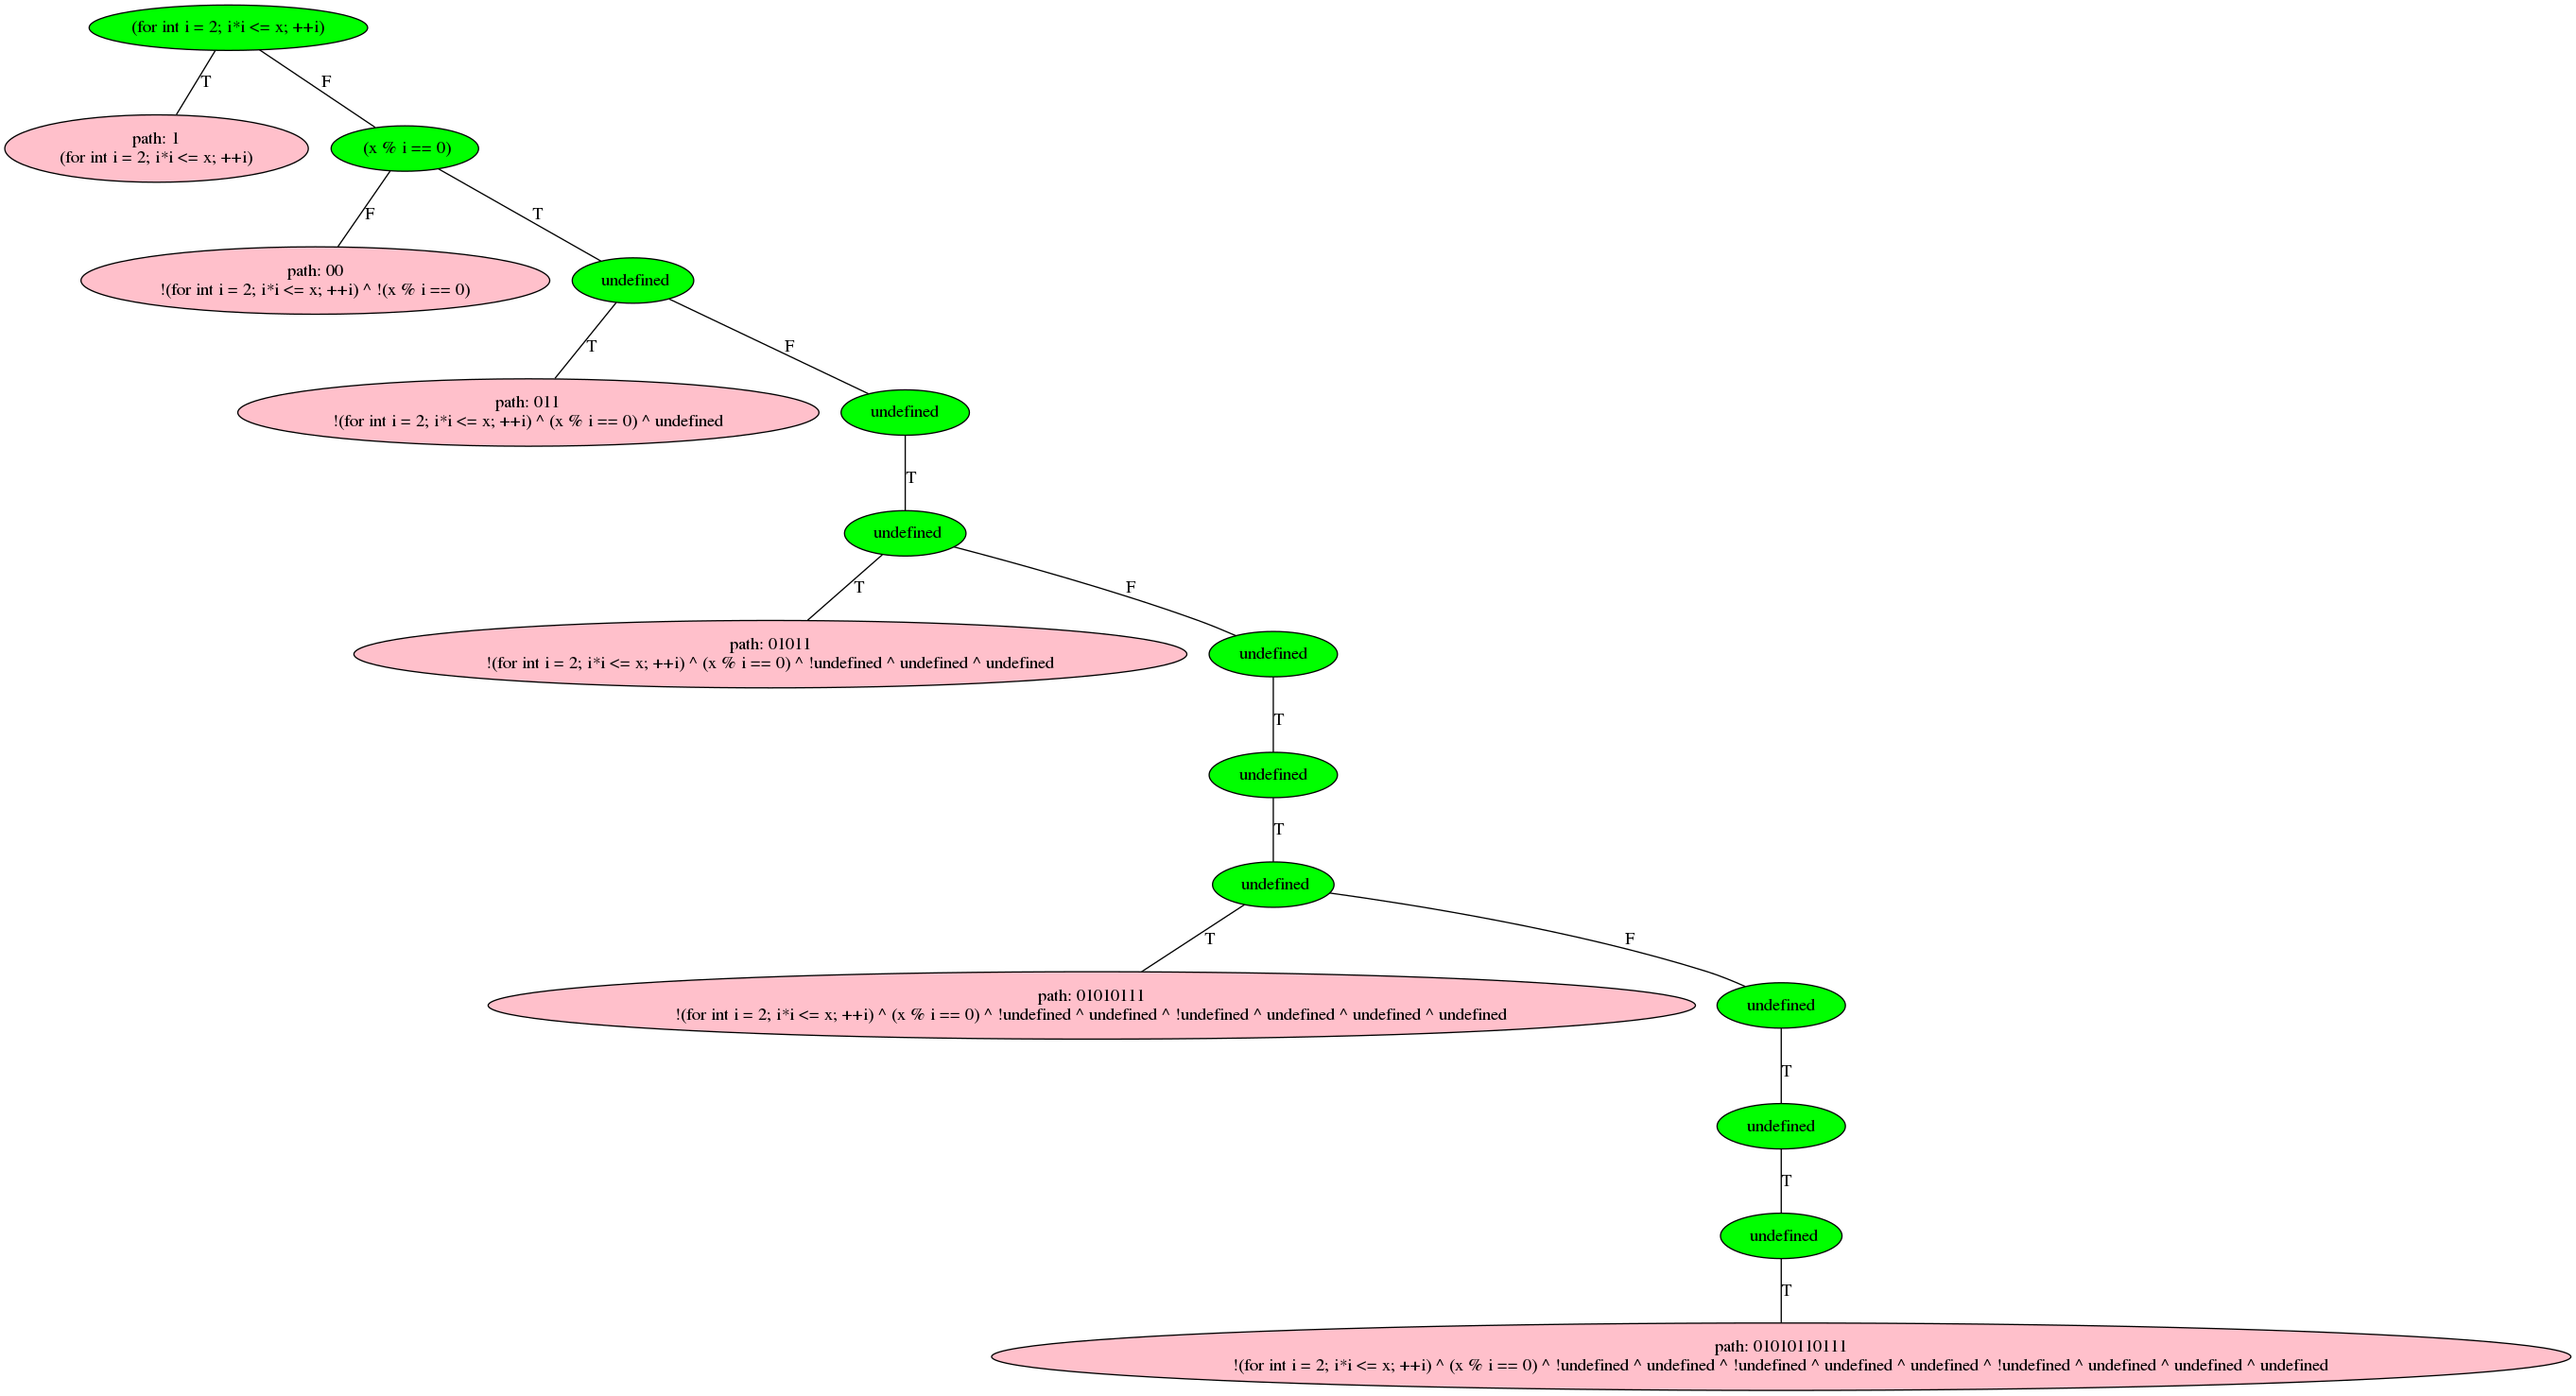

True

In [5]:
import numpy as np
import pydotplus as pydot
from IPython.display import Image, display
import os


#data = np.array([(0, ''), (1,'0'), (2, '1'), (3, '01'), (4, '010'),(5,'011'),(6,'11'),(7,'111'),(8,'0101')])#,(6,'00')])#, (4, '0001'), (5, '00001'), (6, '00000')])
#data = np.array([(0, '','x%5==0'), (1, '1','x%5==0'), (2, '01','x%5==1'), (3, '001','x%5==3'), (4, '0001','x%5==2'), (5, '00001','x%5==4'), (6, '00000','x%5==4')])
#data = np.array([(0, '000','u1'), (1,'001','u1'), (2, '011','u1'), (3, '010','u1'), (4, '110','u1'),(5,'111','u1'),(6,'101','u1'),(7,'100','u1')])#,(8,'0101')])#,(6,'00')])#, (4, '0001'), (5, '00001'), (6, '00000')])
#paths = data[:,1]
#data = np.array([(0, '000','u1'), (1,'001','u1'), (2, '011','u1'), (3, '010','u1'), (4, '110','u1'),(5,'111','u1'),(6,'101','u1'),(7,'100','u1')])#,(8,'0101')])#,(6,'00')])#, (4, '0001'), (5, '00001'), (6, '00000')])
#sympaths = data[:,1:]


data = np.array([])
from io import BytesIO
klee_output_file = open("klee.output.txt","r")
data =np.loadtxt(klee_output_file, dtype=np.dtype, delimiter = ',')
#print(data)
paths = data[:,1]
sympaths = data[:,1:]



uslovi = data[:,2:].tolist()
i=0
for uslov in uslovi:
    u = str(uslov).split('^')
    sympaths[i][2] = u[len(u)-1].replace(']','').replace('[','').replace('\'','').replace(',','').replace('!','').strip()
    i=i+1


i=0

G = pydot.Dot(graph_type="graph")
root = pydot.Node('', style="filled", fillcolor='red',label=data[0][2])
G.add_node(root)


for path,uslovp,uslovc in sympaths:
    if path == '':
        label = uslovc
    else:
        label = "path: "+path+"\n"+uslovp
    node = pydot.Node(path, style="filled", fillcolor='pink',label=label)
    G.add_node(node)
    i=i+1
                

#obidji rekurzivno sve putanje u grafu
#ukoliko prefix putanje ne postoji u stablu tj u listi putanja, pravimo novi cvor koji odgovara toj putanji 
#kako bismo kasnije imali sa čime da ga spojimo
def obidji(path,uslovp,uslovc):
    global paths
    if path[:-1] not in paths:
        paths = np.append(paths,path[:-1])
        node = pydot.Node(path[:-1], style="filled", fillcolor='green',label=str(uslovp).split("^")[len(path[:-1])].replace('!',''))
        G.add_node(node)
        obidji(path[:-1],uslovp,uslovc)
        
        
import numpy as np
visited_paths = []
i=-1
for path,uslovp,uslovc in sympaths:
    i=i+1
    if path == '':
        continue
    else:
        obidji(path,uslovp,uslovc)

paths = np.sort(paths)


import numpy as np
visited_paths = []
i=-1
for path in paths:
    i=i+1
    if path == '':
        continue
    if (path == '0') and path not in visited_paths:
        edge = pydot.Edge('',path,label='F')
        G.add_edge(edge)
        visited_paths.append(path)
        continue
    if (path == '1') and path not in visited_paths:
        edge = pydot.Edge('',path,label='T')
        G.add_edge(edge)
        visited_paths.append(path)
        continue
    else:
        if path not in visited_paths:
            if path[:-1] in visited_paths:
                x = np.where(paths==path[:-1])
                if path[-1] == '0':
                    label = 'F'
                else:
                    label = 'T'
                edge = pydot.Edge(str(paths[x][0]),path,label=label)
                G.add_edge(edge)
                visited_paths.append(path)
            else:
                if path[:-1] in paths:
                    edge = pydot.Edge(path[:-1],path[:-2])
                    G.add_edge(edge)
                    edge = pydot.Edge(path,path[-1])
                    G.add_edge(edge)
                    visited_paths.append(path[:-1])
                else:        
                    node = pydot.Node(path[:-1], style="filled", fillcolor='red',label=path)
                    G.add_node(node)
                    if path[:-1] == '0' or path[:-1] == '1':
                        edge = pydot.Edge(path[:-1],'')
                        G.add_edge(edge)
                        visited_paths.append(path[:-1])
                    else:   
                        edge = pydot.Edge(path[:-1],path[:-2])
                        G.add_edge(edge)
                        visited_paths.append(path[:-1])
                        
            
im = Image(G.create_png())
display(im)
G.write_pdf("stablo.pdf")
G.write_png("stablo.png")